In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from ocrdgen.manager.font import FontManager
from ocrdgen.manager.background import BgManager
from pathlib import Path
import numpy as np
from PIL import ImageDraw, Image
from ocrdgen.ops import boxes_ops
import cv2 as cv
from collections import OrderedDict

In [4]:
from ocrdgen.drawer import DrawWord, DrawText

In [896]:
fm = FontManager(font_dir=Path('data/font/font_files'), font_list_file=Path('data/font/font_list.txt'), font_size=50)
bgm = BgManager(bg_dir=Path('data/bg/'))

In [40]:
img = bgm.get_bg()
np_img = np.array(img)
font, _, _ = fm.get_font()
draw = ImageDraw.Draw(img)
text = "Kabupaten"

In [41]:
teks = "Kabupaten Purbalingga Permana"
dt = DrawText(img, font, text=teks, label="answer", x=10, y=70)

data, image = dt.draw(debug_draw=True)
data

OrderedDict([('text', 'Kabupaten Purbalingga Permana'),
             ('bbox', (10, 80, 740, 46)),
             ('linking', []),
             ('words',
              [OrderedDict([('text', 'Kabupaten'),
                            ('bbox', (10, 80, 242, 46)),
                            ('chars',
                             [OrderedDict([('char', 'K'),
                                           ('bbox', (10, 80, 34, 36))]),
                              OrderedDict([('char', 'a'),
                                           ('bbox', (44, 89, 28, 27))]),
                              OrderedDict([('char', 'b'),
                                           ('bbox', (72, 80, 28, 36))]),
                              OrderedDict([('char', 'u'),
                                           ('bbox', (100, 90, 28, 26))]),
                              OrderedDict([('char', 'p'),
                                           ('bbox', (128, 89, 28, 37))]),
                              OrderedDict([('c

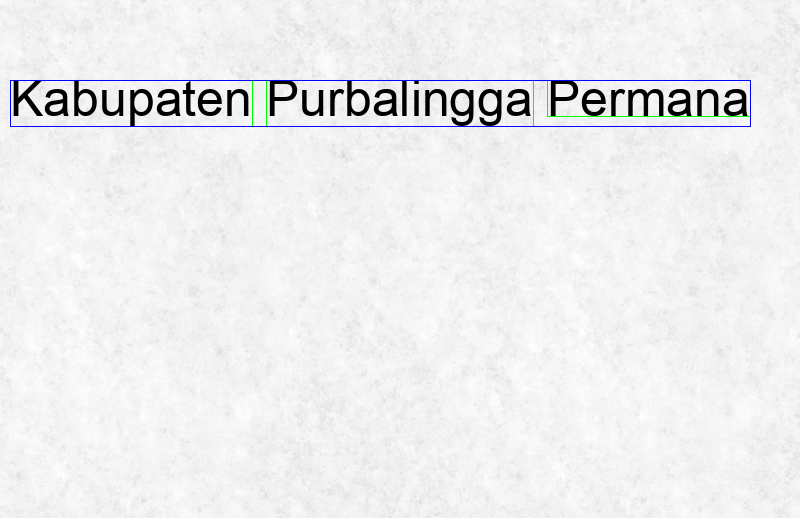

In [42]:
image

In [43]:
teks = "Percobaan text lagi"
dt = DrawText(image, font, text=teks, label="answer", x=10, y=130)

data, image = dt.draw(debug_draw=True)
data

OrderedDict([('text', 'Percobaan text lagi'),
             ('bbox', (10, 140, 428, 46)),
             ('linking', []),
             ('words',
              [OrderedDict([('text', 'Percobaan'),
                            ('bbox', (10, 140, 242, 36)),
                            ('chars',
                             [OrderedDict([('char', 'P'),
                                           ('bbox', (10, 140, 33, 36))]),
                              OrderedDict([('char', 'e'),
                                           ('bbox', (43, 149, 28, 27))]),
                              OrderedDict([('char', 'r'),
                                           ('bbox', (71, 149, 18, 27))]),
                              OrderedDict([('char', 'c'),
                                           ('bbox', (89, 149, 25, 27))]),
                              OrderedDict([('char', 'o'),
                                           ('bbox', (114, 149, 28, 27))]),
                              OrderedDict([('char'

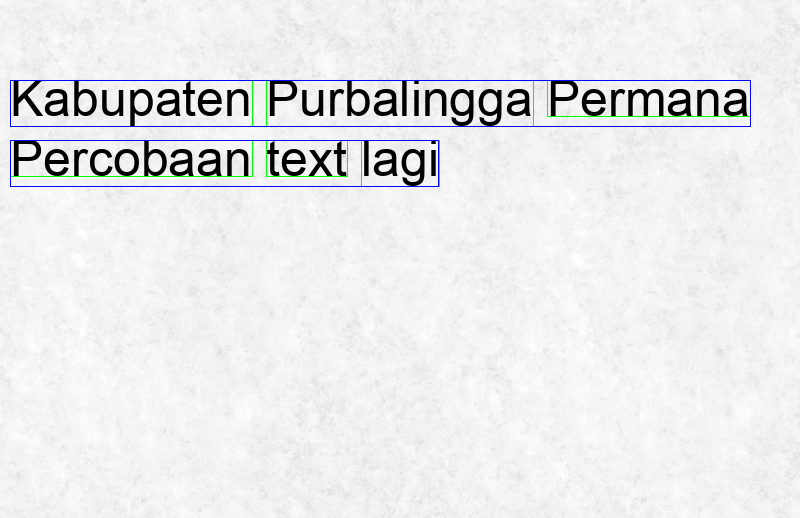

In [44]:
image

In [45]:
dm = DrawWord(img, font, text, x=10, y=70)

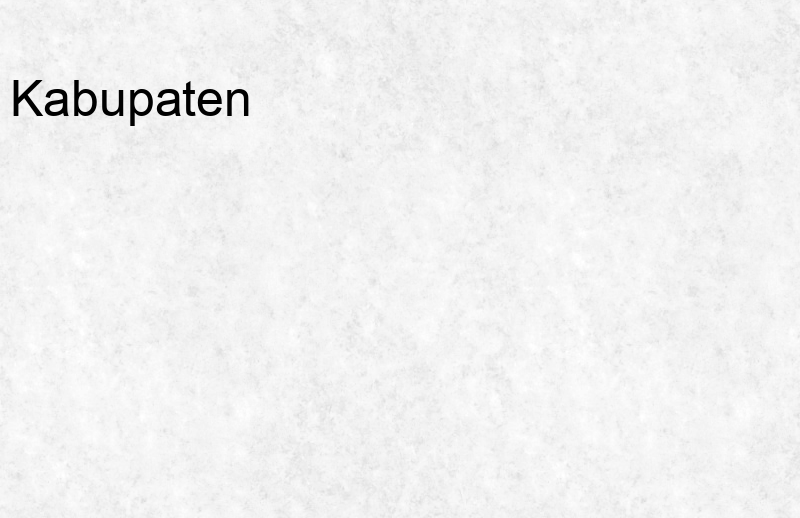

In [46]:
dm.draw()

In [806]:
# dm.draw_rectangle(color=(0,255,0,255), thick=1)

In [19]:
dm.coordinate(), dm.bbox()

(array([[ 10,  70],
        [242,  70],
        [242,  56],
        [ 10,  56]]),
 (10, 80, 242, 46))

In [12]:
dm.xymm(), dm.xywh()

((10, 70, 252, 126), (10, 70, 242, 56))

In [15]:
chardata, charimg = dm.char_bbox(debug_draw=True, color=(255,0,0,255), thick=1)

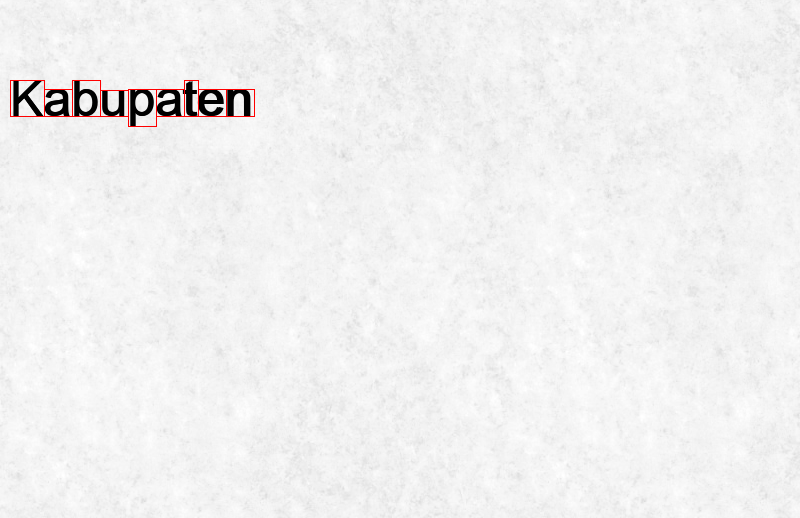

In [16]:
charimg

In [814]:
chardata

[((10, 80, 34, 36), 'K'),
 ((44, 89, 28, 27), 'a'),
 ((72, 80, 28, 36), 'b'),
 ((100, 90, 28, 26), 'u'),
 ((128, 89, 28, 37), 'p'),
 ((156, 89, 28, 27), 'a'),
 ((184, 80, 14, 36), 't'),
 ((198, 89, 28, 27), 'e'),
 ((226, 89, 28, 27), 'n')]

In [726]:
xmin, ymin, xmax, ymax = dm.xymm_bbox()

In [729]:
charimg = cv.rectangle(np.array(charimg), (xmin, ymin), (xmax, ymax), (0,255,0,255), 1)
charimg = Image.fromarray(charimg)

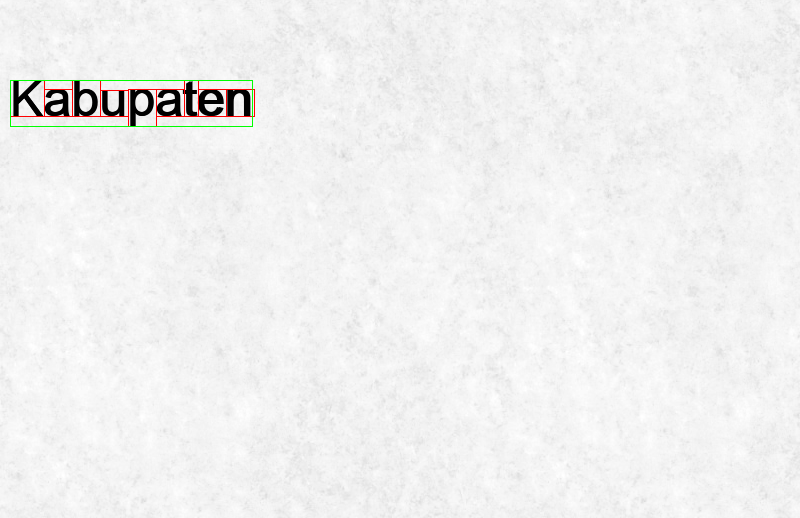

In [730]:
charimg

In [47]:
import textwrap
lines = textwrap.wrap(text, width=40)
y_text = h
for line in lines:
    width, height = font.getsize(line)
    draw.text(((w - width) / 2, y_text), line, font=font, fill=FOREGROUND)
    y_text += height

NameError: name 'h' is not defined